In [ ]:
# imports
import numpy as np
import random as rnd
import p4_aux as p4

# Ejercicio 1

# Ejercicio 2

Con $N=10.000$, queremos aproximar
$$S = \sum^N_{k=1}e^{k/ N}$$

Tomamos $g(i) = exp(i/N)$ y queremos estimar $E[g(X)]$ con $X\sim U(1,10000)$

$$\begin{align}
S &= N * {1\over N} * \sum^N_{k=1}e^{k/ N} \\
S &= N * {1\over N} \sum^N_{k=1}g(x) \\
S &\simeq N * E[g(X)]
\end{align}
$$

In [ ]:
from random import seed
from time import perf_counter
import matplotlib.pyplot as plt

def get_probs(g, nsim, *args):
    seed(1811)
    start = perf_counter()
    
    r = g(*args) if args else g()

    end = perf_counter()
    perf = end - start
    return r, perf

def plot_probs(funs, nsim):
    for n, g, v in funs:
        print(n)
        print(75*'-')
        acc, perf = get_probs(g, nsim, v)
        print(f'Got:\t {acc}')
        print(f'Perf:\t {perf:.3}ms')
        print()

In [ ]:
# Ejercicio 2
import numpy as np
from random import random, seed
N = 10**4

g = lambda x: np.exp(x/N)

def dos_a(*args):
    acc = 0
    for i in range(10000):
        acc += g(i+1)
    return acc

def dos_b(nsim):
    acc = 0
    for _ in range(nsim):
        u = int(random()*N) + 1 # Uniforme [1,10000]
        acc += g(u)
    return acc/nsim * N

def dos_c(nsim):
    acc = 0
    for i in range(nsim):
        acc += g(i+1)
    return acc

In [ ]:
vars_to_evaluate = [
    ('2a', dos_a, []),
    ('2b', dos_b, 100),
    ('2c', dos_c, 100),
]

plot_probs(vars_to_evaluate, 1)

# Ejercicio 3

In [ ]:
# Ejercicio 3
from p3_aux import dice_dn
rnd.seed(1234)

MAX_SIM = 10**6

def inner():
    res = {}
    acc = 0
    while len(res) < 11 and acc < MAX_SIM:
        acc += 1 
        r = dice_dn(6) +  dice_dn(6)
        res[r] = 1 + res.get(r, 0)
    return acc

def outer():
    print(' nsim  |  V Medio | Desviacion ')
    for e in [2,3,4,5]:
        nsim = 10**e
        acc = []
        for _  in range(nsim):
            acc.append(inner())
        print(f'{nsim:6} | {np.mean(acc):8.7} | {np.std(acc):7.7} ')

outer()


In [ ]:
# Ejercicio 3bii
rnd.seed(16661)
def outer():
    print(' nsim  |  P(N >= 15) | P(N <= 9) ')
    for e in [2,3,4,5]:
        nsim = 10**e
        acc15 = 0
        acc9 = 0
        for _  in range(nsim):
            r = inner()
            acc15 += 1 if r >= 15 else 0
            acc9  += 1 if r <= 9  else 0
        print(f'{nsim:6} | {acc15/nsim:11.3} | {acc9/nsim:8.3}')

outer()

# Ejercicio 4

In [ ]:
# Ejercicio 4
from random import random

def var_rech(probs : list):
    ''' implementacion usando el metodo de rechazo
    '''
    ret = None
    while ret is None:
        y = int(random() * 10) 
        valid = random() < probs[y] / max(probs)
        ret = y + 1 if valid else None
    return ret

def var_tinv(probs : dict):
    ''' Implementacion usando transformacion invertida 
    '''
    u = random()
    f = 0
    for k, v in probs.items():
        f += v
        if u <= f:
            return k

def _gen_urna(probs):
    res = []
    for i in range(len(probs)):
        res += [i+1]*int(probs[i]*100)
    return res

def var_urna(urna : list):
    ''' Implementacion usando el metodo de la variable invertida
    '''
    u = int(random() * 100)
    return urna[u]


In [ ]:
from random import seed
import time 

def get_probs(g, nsim, *args):
    seed(1811)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf


In [ ]:
import matplotlib.pyplot as plt

P = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
p_idx = { k: v for k, v in zip(range(1,len(P)+1),P)}
sort = sorted((p_idx.items()), key = lambda x: x[1], reverse=True)
P_ORD = dict(sort)

vars_to_evaluate = [
    ('Rechazo   ',var_rech, P), 
    ('Invertida ',var_tinv, P_ORD),
    ('Urna      ',var_urna, _gen_urna(P)),
    ]


plt.bar([1,2,3,4,5,6,7,8,9,10], [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09], 0.2,color='red', label="Original")
i = 1
for n, g, v in vars_to_evaluate:
    print(n)
    # print('Expected:',PROBS_IDX)
    print(75*'-')
    acc, perf = get_probs(g, 10_000, v)
    print('Got:\t ', acc)
    # print('Perf:\t  ', perf)
    x_axis = list(map(lambda x: x + 0.2*i, acc.keys()))
    y_axis = acc.values()
    plt.bar(x_axis,y_axis, 0.2, label=n)
    i += 1

plt.legend()
plt.show()


# Ejercicio 5

In [ ]:
from random import random, seed
import matplotlib.pyplot as plt

def bin_inv(n,p):
    ''' F(i)    = p(i) + F(i-1)
        
        p(0)    = (1-p)**n
        p(i+1)  = p(i) * (n-i) * (i+1)
    '''
    c = p / (1-p)
    prob = (1-p)**n
    f, i = prob, 0
    u = random()
    while f <= u:
        prob *= c * (n-i) / (i+1)
        f += prob
        i += 1 
    return i

def bin_sim(n,p):
    '''  
    '''
    i = 0
    for _ in range(n):
        u = random()
        if p >= u:
            i += 1
    return i

In [ ]:
import time 

def get_probs(g, nsim, *args):
    seed(1000)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf

N = 10
P = 0.3
vars_to_evaluate = [
    ('Invertida',bin_inv ,[N,P]),
    ('Simulada ',bin_sim ,[N,P])
]

i = 0
for n, g, v in vars_to_evaluate:
    print(n)
    print(75*'-')
    acc, perf = get_probs(g, 10_000, *v)
    print(f'Got:\t {acc}')
    print(f'Perf:\t {perf:.3}ms')
    x_axis = list(map(lambda x: x + i*0.5, acc.keys()))
    y_axis = acc.values()
    plt.bar(x_axis,y_axis, 0.5)
    i += 1
    print()
    
plt.show()

# Ejercicio 6

In [26]:
from random import (random, seed)

P = [0.15, 0.20, 0.10, 0.35, 0.20]
p_idx = { k: v for k, v in zip(range(len(P)),P)} # Pairs (value, prob)
sort = sorted((p_idx.items()), key = lambda x: x[1], reverse=True) # Sort them by probability
P_ORD = dict(sort)

def var_tinv(probs : dict):
    ''' Implementacion usando transformacion invertida \n
        Optimizamos el numero de busquedas ordenando las probabilidades individuales de mayor a menor
    '''
    u = random()
    f = 0
    for k, v in probs.items():
        f += v
        if u <= f:
            return k

def binom_probs(n,p):
    py = []
    prob = (1-p)**n
    py.append(prob)
    for j in range(4):
        prob *= (n-j)/(j+1)
        prob *= p/(1-p)
        py.append(prob)
    return py

def var_rech(px : list):
    ''' implementacion usando el metodo de rechazo
    '''
    ret = None
    py = binom_probs(4,0.45)
    c = max(px) / min(py)
    while ret is None:
        y = int(random() * len(px))
        valid = random() < px[y] / (c * py[y])
        ret = y if valid else None
    return ret

In [30]:
px = P
py = binom_probs(4,0.45)
c = max(px) / min(py)

---------------------------------------------------------------------------
Invertida
Got:	 {0: 0.151, 1: 0.2004, 2: 0.0986, 3: 0.351, 4: 0.199}
Perf:	 0.00853ms
---------------------------------------------------------------------------
Rechazo  
Got:	 {0: 0.1799, 1: 0.0711, 2: 0.0283, 3: 0.1917, 4: 0.529}
Perf:	 0.216ms


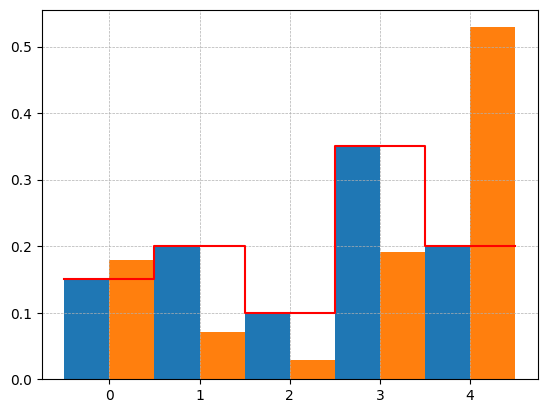

In [28]:
import time 
import matplotlib.pyplot as plt
import numpy as np

def get_probs(g, nsim, *args):
    seed(1000)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf

def plot_expected(probs):
    x_expected = []
    y_expected = []
    for i in range(len(probs)):
        for j in [-1,1]:
            x_expected.append(i+0.5*j)
            y_expected.append(probs[i])
    return x_expected, y_expected

vars_to_evaluate = [
    ('Invertida', var_tinv, [P_ORD]),
    ('Rechazo  ', var_rech, [P_ORD])
]

i = -0.5
for n, g, v in vars_to_evaluate:
    print(75*'-')
    print(n)
    
    acc, perf = get_probs(g, 10_000, *v)
    
    print(f'Got:\t {acc}\n' + 
          f'Perf:\t {perf:.3}ms'
        )
    
    x_axis = list(map(lambda x: x + i*0.5, acc.keys()))
    y_axis = acc.values()
    plt.bar(x_axis,y_axis, 0.5)
    
    i += 1

x_expected, y_expected = plot_expected(P)
plt.plot(x_expected, y_expected,color='red')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()